In [1]:
%load_ext autoreload
%autoreload 2

# Data exploration

Tenemos varias carpetas `*_Public` con datos de muestra para empezar a probar. En `tarballs` están todos los datos.

In [5]:
from pathlib import Path 
import os

path = Path('/fastdata/SN8')
os.listdir(path)

['Louisiana-West_Test_Public',
 'Louisiana-East_Training_Public',
 'resolutions.txt',
 'tarballs',
 'Germany_Training_Public']

In [6]:
path = path / 'tarballs'
os.listdir(path)

['Louisiana-West_Test_Public',
 'Louisiana-East_Training_Public',
 'Germany_Training_Public']

Para los datos de entrenamiento (Germany y Louisiana East) tenemos las carpetas con las imágenes (PRE y POST), csvs con anotaciones y map entre PRE-POST y carpeta con anotaciones en geojson. Para carpeta de test (Louisiana West) no tenemos anotaciones.

In [7]:
location = 'Germany_Training_Public'
# location = 'Louisiana-East_Training_Public'
# location = 'Louisiana-West_Test_Public'

os.listdir(path / location)

['POST-event',
 'PRE-event',
 'Germany_Training_Public_reference.csv',
 'Germany_Training_Public.tar.gz',
 'Germany_Training_Public_label_image_mapping.csv',
 'annotations']

In [8]:
os.listdir(path / 'Louisiana-West_Test_Public')

['POST-event',
 'PRE-event',
 'Louisiana-West_Test_Public_label_image_mapping.csv',
 'Louisiana-West_Test_Public.tar.gz']

El objetivo del challenge es generar una tabla como esta para los datos de test. Para cada imagen PRE hay que detectar edificios y carreteras, indicar cuales de ellos han sido afectados en la imagen POST y algunos datos extra (length y travel time para roads, length se puede calcular y travel time no se usa en la métrica).

In [9]:
import pandas as pd 

ref = pd.read_csv(path / location / f'{location}_reference.csv')
ref

,ImageId,Object,Wkt_Pix,Flooded,length_m,travel_time_s
0,10500500C4DD7000_0_44_69,Road,LINESTRING EMPTY,Null,Null,Null
1,10500500C4DD7000_0_37_69,Road,LINESTRING (1300.0000000000637 125.11088048440...,False,9.594785852252468,0.7154308229131224
2,10500500C4DD7000_0_37_69,Road,LINESTRING (1264.8329929537006 119.92324021553...,False,26.11318204209286,1.9471174870326937
3,10500500C4DD7000_0_37_69,Road,LINESTRING (1170.2292368980147 103.03829985213...,False,4.608716229547972,0.3436468197885329
4,10500500C4DD7000_0_37_69,Road,LINESTRING (1153.0236964009407 101.67574928408...,False,32.691009032933465,2.437590150988239
...,...,...,...,...,...,...
9756,10500500C4DD7000_0_39_62,Building,POLYGON ((1244.3282336131044 1219.133175691375...,False,Null,Null
9757,10500500C4DD7000_0_39_62,Building,POLYGON ((1170.296319456027 1253.9450068508927...,False,Null,Null
9758,10500500C4DD7000_0_21_63,Building,POLYGON EMPTY,Null,Null,Null
9759,10500500C4DD7000_0_15_66,Building,POLYGON EMPTY,Null,Null,Null


In [10]:
len(ref.ImageId.unique())

202

In [11]:
from glob import glob 

pre = glob(f'{path}/{location}/PRE-event/*')
len(pre)

202

Pueden haber varias imágenes POST por cada imagen PRE.

In [12]:
post = glob(f'{path}/{location}/POST-event/*')
len(post)

282

La carpeta annotations incluye un geojson para cada imagen PRE con los edificios y carreteras afectados.

In [13]:
anns = glob(f'{path}/{location}/annotations/*')
len(anns)

202

El `label_image_mapping` csv contiene la relación entre imágenes PRE y POST.

In [14]:
import pandas as pd 

mapping = pd.read_csv(path / location / f'{location}_label_image_mapping.csv')
mapping

,label,pre-event image,post-event image 1,post-event image 2
0,0_41_59.geojson,10500500C4DD7000_0_41_59.tif,10500500E6DD3C00_0_41_59.tif,NaN
1,0_45_64.geojson,10500500C4DD7000_0_45_64.tif,10500500E6DD3C00_0_45_64.tif,NaN
2,0_32_59.geojson,10500500C4DD7000_0_32_59.tif,10500500E6DD3C00_0_32_59.tif,NaN
3,0_38_61.geojson,10500500C4DD7000_0_38_61.tif,10500500E6DD3C00_0_38_61.tif,NaN
4,0_36_60.geojson,10500500C4DD7000_0_36_60.tif,10500500E6DD3C00_0_36_60.tif,NaN
...,...,...,...,...
197,0_42_62.geojson,10500500C4DD7000_0_42_62.tif,10500500E6DD3C00_0_42_62.tif,NaN
198,0_31_62.geojson,10500500C4DD7000_0_31_62.tif,10500500E6DD3C00_0_31_62.tif,NaN
199,0_31_66.geojson,10500500C4DD7000_0_31_66.tif,10500500E6DD3C00_0_31_66.tif,NaN
200,0_27_62.geojson,10500500C4DD7000_0_27_62.tif,1040050035DC3B00_0_27_62.tif,10500500E6DD3C00_0_27_62.tif


Todos los datos en anotaciones son de imágenes pre !

In [19]:
# for image in mapping['pre-event image']:
for image in mapping['post-event image 1']:
# for image in mapping['post-event image 2'].dropna():
	image_id = image[:-4]
	if len(ref[ref['ImageId'] == image_id]) > 0:
		print("stop")
		break

Podemos visualizar imágenes

/home/juan/miniconda3/envs/sn8/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/juan/miniconda3/envs/sn8/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/juan/miniconda3/envs/sn8/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/juan/miniconda3/envs/sn8/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/juan/miniconda3/envs/sn8/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


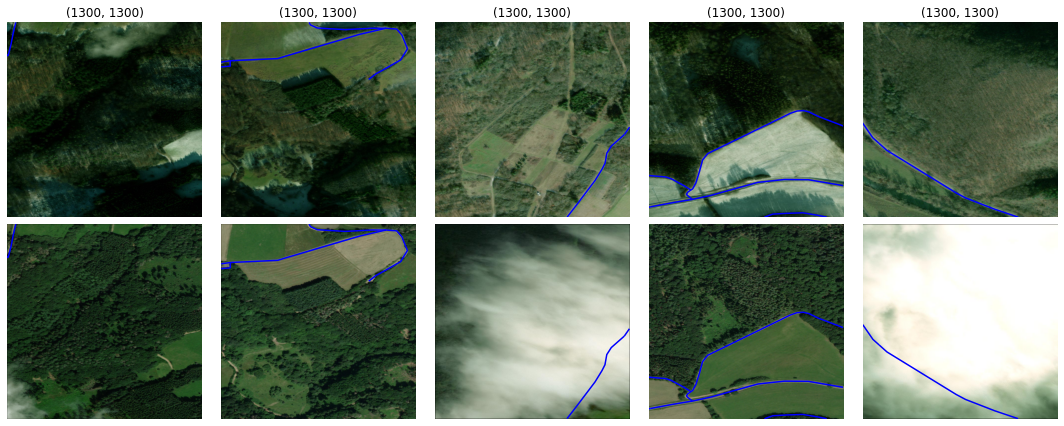

In [20]:
import matplotlib.pyplot as plt 
import rasterio as rio 
import geopandas as gpd 
from rasterio.plot import show
import math 

n_samples = 5
fig = plt.figure(figsize=(n_samples*3,6))
for i in range(n_samples):
	ax = plt.subplot(2, n_samples, i + 1)
	sample = mapping.sample(1).iloc[0]
	gdf = gpd.read_file(path / location / 'annotations' / sample['label'])
	gdf.plot(ax=ax, color='blue')
	ds = rio.open(path / location / 'PRE-event' / sample['pre-event image'])
	show(ds, ax=ax, transform=ds.transform)
	ax.axis('off')
	ax.set_title(ds.shape)
	ax = plt.subplot(2, n_samples, i + 1 + n_samples)
	gdf[gdf.flooded == 'yes'].plot(ax=ax, color='red')
	gdf[gdf.flooded != 'yes'].plot(ax=ax, color='blue')
	if isinstance(sample['post-event image 2'], str):
		ds = rio.open(path / location / 'POST-event' / sample['post-event image 2'])
	else:
		ds = rio.open(path / location / 'POST-event' / sample['post-event image 1'])
	show(ds, ax=ax, transform=ds.transform)
	ax.axis('off')
plt.tight_layout()
plt.show()

Las imágenes PRE son todas de 1300 x 1300, mientras que las POST varian.

In [21]:
from tqdm import tqdm 

locations = ['Germany_Training_Public', 'Louisiana-East_Training_Public', 'Louisiana-West_Test_Public']

missing = {}
for location in locations:
	print(location)
	missing[location] = []
	min_pre_w, max_pre_w, min_pre_h, max_pre_h = 1e10, 0, 1e10, 0
	min_post_w, max_post_w, min_post_h, max_post_h = 1e10, 0, 1e10, 0
	mapping = pd.read_csv(path / location / f'{location}_label_image_mapping.csv')
	for _, sample in tqdm(mapping.iterrows(), total=len(mapping)):
		ds = rio.open(path / location / 'PRE-event' / sample['pre-event image'])
		min_pre_w = min(min_pre_w, ds.width)
		max_pre_w = max(max_pre_w, ds.width)
		min_pre_h = min(min_pre_h, ds.height)
		max_pre_h = max(max_pre_h, ds.height)
		try:
			ds = rio.open(path / location / 'POST-event' / sample['post-event image 1'])
			min_post_w = min(min_post_w, ds.width)
			max_post_w = max(max_post_w, ds.width)
			min_post_h = min(min_post_h, ds.height)
			max_post_h = max(max_post_h, ds.height)
		except:
			missing[location].append(sample['post-event image 1'])
		if isinstance(sample['post-event image 2'], str):
			try:
				ds = rio.open(path / location / 'POST-event' / sample['post-event image 2'])
				min_post_w = min(min_post_w, ds.width)
				max_post_w = max(max_post_w, ds.width)
				min_post_h = min(min_post_h, ds.height)
				max_post_h = max(max_post_h, ds.height)
			except:
				missing[location].append(sample['post-event image 2'])
	print(f'PRE-event: {min_pre_w}-{max_pre_w} x {min_pre_h}-{max_pre_h}')
	print(f'POST-event: {min_post_w}-{max_post_w} x {min_post_h}-{max_post_h}')

Germany_Training_Public


100%|██████████| 202/202 [00:15<00:00, 12.97it/s]


PRE-event: 1300-1300 x 1300-1300
POST-event: 785-1743 x 785-1743
Louisiana-East_Training_Public


100%|██████████| 599/599 [00:38<00:00, 15.44it/s]


PRE-event: 1300-1300 x 1300-1300
POST-event: 715-1114 x 834-1114
Louisiana-West_Test_Public


100%|██████████| 406/406 [00:28<00:00, 14.07it/s]

PRE-event: 1300-1300 x 1300-1300
POST-event: 748-962 x 915-962


In [22]:
missing

{'Germany_Training_Public': [],
 'Louisiana-East_Training_Public': [],
 'Louisiana-West_Test_Public': []}

Aquí calculo el número máximos de polígonos y carreteras, así como sus longitudes máximas (en número de coordenadas). Las carreteras se representan con hasta 74 puntos, mientras que los edificios llegan a 148 puntos. Las imagen que más carreteras tiene es 28, mientras que la que más edificios tiene son 233.

In [23]:
from tqdm import tqdm 
import shapely

locations = ['Germany_Training_Public', 'Louisiana-East_Training_Public']

stats = {}
for location in locations:
	print(location)
	stats[location] = {'polys': [], 'lines': [], 'n_polys': []}
	max_pols, max_lines, min_pols, min_lines = 0, 0, 0, 0
	max_pol_len, max_line_len, min_pol_len, min_line_len = 0, 0, 0, 0
	ref = pd.read_csv(path / location / f'{location}_label_image_mapping.csv')
	for label in tqdm(ref.label):
		gdf = gpd.read_file(path / location / 'annotations' / label)
		gdf.explode()
		pols = [x for x in gdf.geometry if x.type == 'Polygon']
		n_pols = len(pols)
		stats[location]['polys'].append(n_pols) 
		lines = [x for x in gdf.geometry if x.type == 'LineString']
		n_lines = len(lines)
		stats[location]['lines'].append(n_lines)
		max_pols = n_pols if n_pols > max_pols else max_pols
		min_pols = n_pols if n_pols < min_pols else min_pols
		max_lines = n_lines if n_lines > max_lines else max_lines
		min_lines = n_lines if n_lines < min_lines else min_lines
		for pol in pols:
			n_coords = len(list(pol.exterior.coords))*2
			stats[location]['n_polys'].append(n_coords)
			max_pol_len = n_coords if n_coords > max_pol_len else max_pol_len
			min_pol_len = n_coords if n_coords < min_pol_len else min_pol_len
		for line in lines:
			n_coords = len(list(line.coords))*2
			max_line_len = n_coords if n_coords > max_line_len else max_line_len
			min_line_len = n_coords if n_coords < min_line_len else min_line_len
	print(min_pols, max_pols, min_lines, max_lines)
	print(min_pol_len, max_pol_len, min_line_len, max_line_len)


Germany_Training_Public


100%|██████████| 202/202 [00:03<00:00, 60.61it/s]


0 233 0 27
0 96 0 74
Louisiana-East_Training_Public


100%|██████████| 599/599 [00:09<00:00, 60.20it/s]

0 231 0 28
0 148 0 68


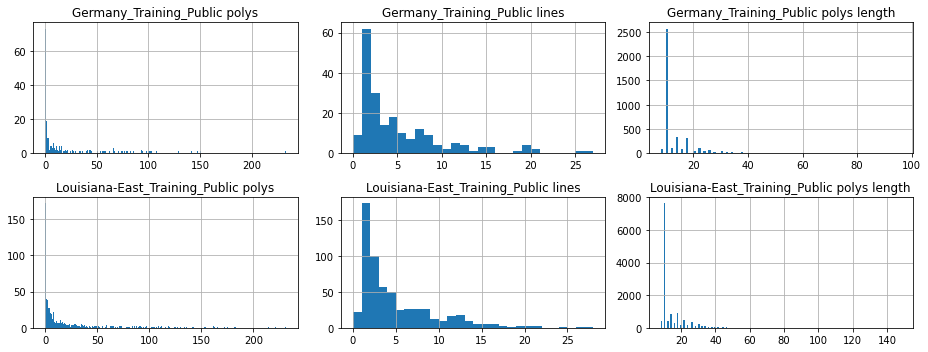

In [24]:
fig = plt.figure(figsize=(13, 5))
for i, location in enumerate(locations):
	ax = plt.subplot(2, 3, 3*i+1)
	df = pd.DataFrame(stats[location]['polys'])
	df.hist(bins=max(stats[location]['polys']), ax=ax)
	# print(location)
	# print(df.describe())
	ax.set_title(f'{location} polys')
	ax = plt.subplot(2, 3, 3*i+2)
	df = pd.DataFrame(stats[location]['lines'])
	# print(df.describe())
	df.hist(bins=max(stats[location]['lines']), ax=ax)
	ax.set_title(f'{location} lines')
	ax = plt.subplot(2, 3, 3*i+3)
	df = pd.DataFrame(stats[location]['n_polys'])
	df.hist(bins=max(stats[location]['n_polys']), ax=ax)
	# print(df.describe())
	ax.set_title(f'{location} polys length')
plt.tight_layout()
plt.show()

Muy desbalanceado en el número de polígonos (muchas imágenes con 0). La mayoría de polígonos tiene 10 coords.

In [25]:
pd.DataFrame(stats['Germany_Training_Public']['n_polys']).mode()

,0
0,10


Creo que es un contexto demasiado grande como para generarlos de manera autoregresiva.

In [26]:
235*(148+1), 160*(4+1)

(35015, 800)

Idea: resnet con inputs a 512x512 pillo última feature a 16x16 y se pasa a dos cov layers, una para buildings con [B, 148+1, 16, 16] y otra para roads con [B, 4+1, 16, 16], luego rearrange de las ultimas dos dims para tener 256 elementos. Los valores en los outputs son las coords normalizadas más 1 (flooded o no). Para polys, no predecir ultimo valor ya que lo pondré luego para asegurarme que cierra. Para roads, length y travel time puede ser postprocesado. Ordenar de mayor a menor longitud en pols, usar -1 para entradas vacías (como padding en NLP o background en detection). Predicción en sliding window (de la manera en la que se evalúa no debería ser muy problemático). Para data augmentation (crops, flips) habrá que implementar custom logic.

Alternativa: rasterizar, segmentation y vectorizar.

In [27]:
math.sqrt(256)

16.0

In [28]:
256/2/2/2/2

16.0